In [1]:
import pandas as pd

df = pd.read_csv("../data/credit_default.csv")

df = df.rename(columns={
    "default.payment.next.month": "default_payment_next_month"
})

df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [2]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["default_payment_next_month"])
y = df["default_payment_next_month"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


/Users/muhammadsaim/mlops_finance_project/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/muhammadsaim/mlops_finance_project/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/muhammadsaim/mlops_finance_project/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/muhammadsaim/mlops_finance_project/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/muhammadsaim/mlops_finance_project/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWar

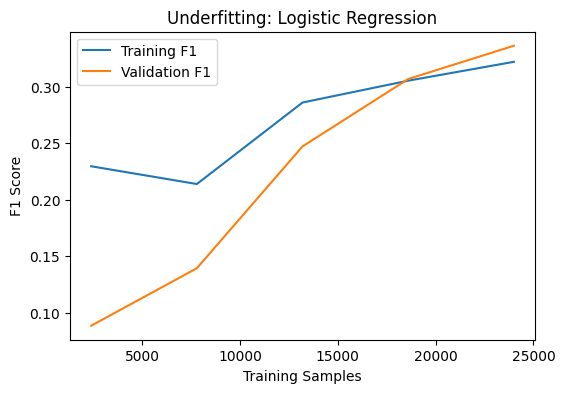

In [4]:
train_sizes, train_scores, val_scores = learning_curve(
    LogisticRegression(max_iter=1000),
    X,
    y,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_mean, label="Training F1")
plt.plot(train_sizes, val_mean, label="Validation F1")
plt.xlabel("Training Samples")
plt.ylabel("F1 Score")
plt.title("Underfitting: Logistic Regression")
plt.legend()
plt.show()


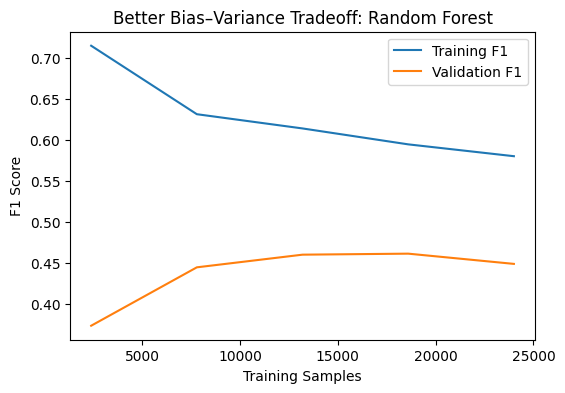

In [5]:
train_sizes, train_scores, val_scores = learning_curve(
    RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        random_state=42
    ),
    X,
    y,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_mean, label="Training F1")
plt.plot(train_sizes, val_mean, label="Validation F1")
plt.xlabel("Training Samples")
plt.ylabel("F1 Score")
plt.title("Better Bias–Variance Tradeoff: Random Forest")
plt.legend()
plt.show()


Bias–Variance Observation:
Random Forest demonstrates a better bias–variance tradeoff. Although the training score is higher, the validation score also improves and remains close, indicating controlled overfitting and strong generalization.

/Users/muhammadsaim/mlops_finance_project/venv/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


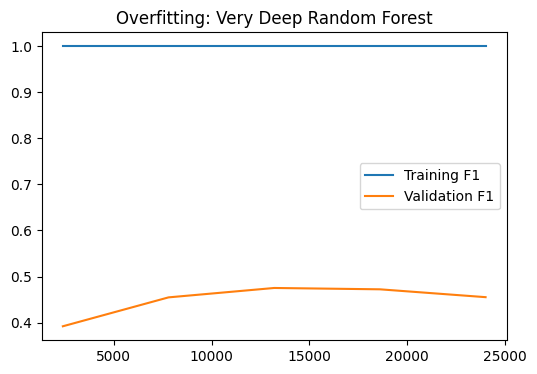

In [6]:
rf_overfit = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    random_state=42
)

train_sizes, train_scores, val_scores = learning_curve(
    rf_overfit,
    X,
    y,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training F1")
plt.plot(train_sizes, val_scores.mean(axis=1), label="Validation F1")
plt.title("Overfitting: Very Deep Random Forest")
plt.legend()
plt.show()


Overfitting Observation:
Increasing model complexity leads to high training performance but reduced validation performance, indicating overfitting due to excessive model capacity.

Overfitting vs Underfitting Summary:
Baseline linear models underfit the dataset, failing to capture complex patterns. Ensemble models reduce underfitting by learning non-linear relationships. Controlled ensemble methods achieve the best generalization performance, while excessively complex models can overfit.